## Calculating Overlap between samples

All places where changes are needed are indicated as Steps throughout this notebook.

# Step 1: Import Required Packages


In [1]:
%%capture
%matplotlib inline
import pandas as pd
import seaborn as sns
from IPython.html.widgets import interact

try:
    import pyclonal
except ImportError:
    pyclonal_path = os.path.abspath(os.path.join('..'))
    if pyclonal_path not in sys.path:
        sys.path.append(pyclonal_path)

from pyclonal.io import combineFiles
from pyclonal.utils import distance

# Step 2 : Change file path to input your data

In [2]:
#make a df like the combinedFiles output
data = pd.read_csv("/Users/michellemiron/Desktop/test_immunedb/2018-08-22-11-12_clone_overlap.tsv", sep="\t")


In [3]:
data

,clone_id,sample,uniques,copies
0,1,003042-003042_Rep1,1,3
1,3,003042-003042_Rep2,1,48
2,5,003042-003042_Rep2,1,3
3,6,003042-003042_Rep2,1,2
4,7,003042-003042_Rep1,2,7
5,4,003042-003042_Rep2,3,8
6,11,003042-003042_Rep1,1,5
7,10,003042-003042_Rep1,1,2
8,12,003042-003042_Rep1,4,221
9,9,003042-003042_Rep1,9,327


In [4]:
data_pivot = data.pivot(index='sample',columns='clone_id',values='copies').fillna(0)

In [5]:
data_pivot


clone_id,1,2,3,4,5,6,7,8,9,10,...,1312535,1312536,1312537,1312538,1312539,1312540,1312541,1312542,1312543,1312544
sample,,,,,,,,,,,,,,,,,,,,,
001-370-6-rep1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001-370-6-rep2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001-370-6-rep3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001-370-6-rep4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001-370-6-rep5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001-370-6-rep6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001-382-1-rep1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001-382-1-rep2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001-382-1-rep3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Step 3 :  Change file path to input your metadata

In [4]:
#import metadata

metadata=pd.read_csv("/Users/michellemiron/Desktop/test_immunedb/2018-08-22-11-35_samples.tsv",
                     sep = "\t", index_col='filename')



In [5]:
metadata

,subject,input_sequences,identified,in_frame,stops,functional,clones,date,timepoint,tissue,id
filename,,,,,,,,,,,
001-370-6-rep1,003051-003051,77598,62504,67806,7630,65856,2571,20180720,R1Y,Blood,467
001-370-6-rep2,003051-003051,98025,78809,87424,7541,84655,2970,20180720,R1Y,Blood,468
001-370-6-rep3,003051-003051,90999,72709,81529,7797,78722,2813,20180720,R1Y,Blood,469
001-370-6-rep4,003051-003051,89266,66378,80440,6750,77788,2844,20180720,R1Y,Blood,470
001-370-6-rep5,003051-003051,82850,63747,75129,6012,72835,3123,20180720,R1Y,Blood,471
001-370-6-rep6,003051-003051,94514,71176,84539,8168,81211,4009,20180720,R1Y,Blood,472
001-382-1-rep1,003175-003175,56239,42859,49952,4551,48369,5881,20180720,PRM,Blood,473
001-382-1-rep2,003175-003175,94718,76433,84144,7682,81368,9140,20180720,PRM,Blood,474
001-382-1-rep3,003175-003175,94508,71915,84453,6940,82010,8580,20180720,PRM,Blood,475


# Step 4: Filter Data 

In this case it is the patient that we are specifying

In [6]:
subject = "003051-003051"

# Step 5: Perform Calculations (Cosine and Jaccard)

In [9]:
cosine_dist = distance(data_pivot, metadata, field='subject', value=subject)
cosine_dist

,001-370-6-rep2,001-370-6-rep1,001-370-6-rep3,001-370-6-rep4,001-370-6-rep5,001-370-6-rep6,003051-003051-rep3,003051-003051-rep4,003051-003051-rep5,003051-003051-rep6,003051-003051_Rep1,003051-003051_Rep2,0792-1654-5-rep1,0792-1654-5-rep2,0792-1654-5-rep3,0792-1654-5-rep4,0792-1654-5-rep5,0792-1654-5-rep6
001-370-6-rep1,0.802084,1.000000e+00,0.816639,0.690199,0.852796,0.843911,8.906082e-01,8.896541e-01,0.888387,7.742149e-01,8.304405e-07,0.011018,0.019826,0.024391,0.025872,0.027655,0.021650,0.019008
001-370-6-rep2,1.000000,8.020841e-01,0.822345,0.702038,0.857587,0.848577,8.915693e-01,8.906468e-01,0.889337,7.749585e-01,1.152270e-06,0.011024,0.029874,0.035863,0.037471,0.039989,0.031446,0.026988
001-370-6-rep3,0.822345,8.166389e-01,1.000000,0.758347,0.879977,0.872428,9.054163e-01,9.047156e-01,0.903229,7.870713e-01,4.117802e-06,0.011200,0.069437,0.084801,0.088928,0.096510,0.073966,0.063757
001-370-6-rep4,0.702038,6.901987e-01,0.758347,1.000000,0.780343,0.784437,7.443145e-01,7.437218e-01,0.742701,6.470887e-01,3.405069e-06,0.009205,0.287196,0.348707,0.364548,0.400457,0.301363,0.264117
001-370-6-rep5,0.857587,8.527961e-01,0.879977,0.780343,1.000000,0.909724,9.473275e-01,9.464775e-01,0.945133,8.235822e-01,7.783245e-06,0.011715,0.060705,0.074290,0.077783,0.084356,0.063657,0.056149
001-370-6-rep6,0.848577,8.439115e-01,0.872428,0.784437,0.909724,1.000000,9.360194e-01,9.351399e-01,0.933819,8.137346e-01,1.889651e-06,0.011581,0.070669,0.085719,0.090900,0.098477,0.074876,0.065816
003051-003051-rep3,0.891569,8.906082e-01,0.905416,0.744314,0.947327,0.936019,1.000000e+00,9.959850e-01,0.994707,8.670217e-01,1.964120e-08,0.012330,0.000120,0.000107,0.000088,0.000119,0.000035,0.000063
003051-003051-rep4,0.890647,8.896541e-01,0.904716,0.743722,0.946477,0.935140,9.959850e-01,1.000000e+00,0.993722,8.661277e-01,4.096135e-08,0.012323,0.000265,0.000200,0.000115,0.000320,0.000143,0.000025
003051-003051-rep5,0.889337,8.883871e-01,0.903229,0.742701,0.945133,0.933819,9.947072e-01,9.937218e-01,1.000000,8.725799e-01,8.542183e-06,0.012305,0.000101,0.000147,0.000089,0.000064,0.000183,0.000130
003051-003051-rep6,0.774958,7.742149e-01,0.787071,0.647089,0.823582,0.813735,8.670217e-01,8.661277e-01,0.872580,1.000000e+00,4.484569e-08,0.010722,0.000018,0.000017,0.000027,0.000027,0.000081,0.000039


In [18]:
cosine_dist.to_csv('/Users/michellemiron/Desktop/test_immunedb/cosinedist.csv')

In [14]:
cosine_dist = pd.read_csv("/Users/michellemiron/Desktop/test_immunedb/cosinedist.csv",
                         index_col=0)


In [15]:
cosine_dist

,001-370-6-rep2,001-370-6-rep1,001-370-6-rep3,001-370-6-rep4,001-370-6-rep5,001-370-6-rep6,003051-003051-rep3,003051-003051-rep4,003051-003051-rep5,003051-003051-rep6,003051-003051_Rep1,003051-003051_Rep2,0792-1654-5-rep1,0792-1654-5-rep2,0792-1654-5-rep3,0792-1654-5-rep4,0792-1654-5-rep5,0792-1654-5-rep6
001-370-6-rep1,0.802084,1.000000e+00,0.816639,0.690199,0.852796,0.843911,8.906082e-01,8.896541e-01,0.888387,7.742149e-01,8.304405e-07,0.011018,0.019826,0.024391,0.025872,0.027655,0.021650,0.019008
001-370-6-rep2,1.000000,8.020841e-01,0.822345,0.702038,0.857587,0.848577,8.915693e-01,8.906468e-01,0.889337,7.749585e-01,1.152270e-06,0.011024,0.029874,0.035863,0.037471,0.039989,0.031446,0.026988
001-370-6-rep3,0.822345,8.166389e-01,1.000000,0.758347,0.879977,0.872428,9.054163e-01,9.047156e-01,0.903229,7.870713e-01,4.117802e-06,0.011200,0.069437,0.084801,0.088928,0.096510,0.073966,0.063757
001-370-6-rep4,0.702038,6.901987e-01,0.758347,1.000000,0.780343,0.784437,7.443145e-01,7.437218e-01,0.742701,6.470887e-01,3.405069e-06,0.009205,0.287196,0.348707,0.364548,0.400457,0.301363,0.264117
001-370-6-rep5,0.857587,8.527961e-01,0.879977,0.780343,1.000000,0.909724,9.473275e-01,9.464775e-01,0.945133,8.235822e-01,7.783245e-06,0.011715,0.060705,0.074290,0.077783,0.084356,0.063657,0.056149
001-370-6-rep6,0.848577,8.439115e-01,0.872428,0.784437,0.909724,1.000000,9.360194e-01,9.351399e-01,0.933819,8.137346e-01,1.889651e-06,0.011581,0.070669,0.085719,0.090900,0.098477,0.074876,0.065816
003051-003051-rep3,0.891569,8.906082e-01,0.905416,0.744314,0.947327,0.936019,1.000000e+00,9.959850e-01,0.994707,8.670217e-01,1.964120e-08,0.012330,0.000120,0.000107,0.000088,0.000119,0.000035,0.000063
003051-003051-rep4,0.890647,8.896541e-01,0.904716,0.743722,0.946477,0.935140,9.959850e-01,1.000000e+00,0.993722,8.661277e-01,4.096135e-08,0.012323,0.000265,0.000200,0.000115,0.000320,0.000143,0.000025
003051-003051-rep5,0.889337,8.883871e-01,0.903229,0.742701,0.945133,0.933819,9.947072e-01,9.937218e-01,1.000000,8.725799e-01,8.542183e-06,0.012305,0.000101,0.000147,0.000089,0.000064,0.000183,0.000130
003051-003051-rep6,0.774958,7.742149e-01,0.787071,0.647089,0.823582,0.813735,8.670217e-01,8.661277e-01,0.872580,1.000000e+00,4.484569e-08,0.010722,0.000018,0.000017,0.000027,0.000027,0.000081,0.000039


In [10]:
#save cosine onto my local computer

In [11]:
jaccard_dist = distance(data_pivot, metadata, field='subject', value=subject, method='jaccard')
jaccard_dist

,001-370-6-rep2,001-370-6-rep1,001-370-6-rep3,001-370-6-rep4,001-370-6-rep5,001-370-6-rep6,003051-003051-rep3,003051-003051-rep4,003051-003051-rep5,003051-003051-rep6,003051-003051_Rep1,003051-003051_Rep2,0792-1654-5-rep1,0792-1654-5-rep2,0792-1654-5-rep3,0792-1654-5-rep4,0792-1654-5-rep5,0792-1654-5-rep6
001-370-6-rep1,0.001274,NaN,0.000937,0.000932,0.001064,0.000767,0.000142,0.000156,0.000175,0.000658,0.000000,0.000000,0.000420,0.000248,0.000255,0.000256,0.000000,0.000509
001-370-6-rep2,NaN,0.001274,0.000525,0.001217,0.000995,0.001595,0.000135,0.000000,0.000254,0.000000,0.000000,0.000000,0.000326,0.000240,0.000329,0.000413,0.000184,0.000293
001-370-6-rep3,0.000525,0.000937,NaN,0.001251,0.000510,0.001184,0.000688,0.000151,0.000343,0.000305,0.000000,0.000000,0.000082,0.000648,0.000416,0.000168,0.000280,0.000198
001-370-6-rep4,0.001217,0.000932,0.001251,NaN,0.001697,0.001625,0.000274,0.000300,0.000086,0.000302,0.000000,0.000000,0.000000,0.000242,0.000166,0.000334,0.000093,0.000099
001-370-6-rep5,0.000995,0.001064,0.000510,0.001697,NaN,0.000992,0.000396,0.000719,0.000084,0.000557,0.000000,0.000000,0.000241,0.000000,0.000406,0.000245,0.000000,0.000771
001-370-6-rep6,0.001595,0.000767,0.001184,0.001625,0.000992,NaN,0.000947,0.000511,0.000468,0.000447,0.000000,0.000177,0.000375,0.000517,0.000227,0.000533,0.000168,0.000622
003051-003051-rep3,0.000135,0.000142,0.000688,0.000274,0.000396,0.000947,NaN,0.000966,0.001742,0.001011,0.000375,0.000000,0.000072,0.000071,0.000073,0.000147,0.000081,0.000085
003051-003051-rep4,0.000000,0.000156,0.000151,0.000300,0.000719,0.000511,0.000966,NaN,0.001031,0.000694,0.000000,0.000000,0.000303,0.000373,0.000153,0.000000,0.000255,0.000000
003051-003051-rep5,0.000254,0.000175,0.000343,0.000086,0.000084,0.000468,0.001742,0.001031,NaN,0.000862,0.000000,0.000190,0.000000,0.000163,0.000166,0.000167,0.000119,0.000062
003051-003051-rep6,0.000000,0.000658,0.000305,0.000302,0.000557,0.000447,0.001011,0.000694,0.000862,NaN,0.000000,0.000000,0.000000,0.000100,0.000000,0.000000,0.000000,0.000000


In [19]:
jaccard_dist.to_csv('/Users/michellemiron/Desktop/test_immunedb/jaccarddist.csv')


In [16]:
jaccard_dist = pd.read_csv("/Users/michellemiron/Desktop/test_immunedb/jaccarddist.csv",
                          index_col=0)


In [17]:
jaccard_dist

,001-370-6-rep2,001-370-6-rep1,001-370-6-rep3,001-370-6-rep4,001-370-6-rep5,001-370-6-rep6,003051-003051-rep3,003051-003051-rep4,003051-003051-rep5,003051-003051-rep6,003051-003051_Rep1,003051-003051_Rep2,0792-1654-5-rep1,0792-1654-5-rep2,0792-1654-5-rep3,0792-1654-5-rep4,0792-1654-5-rep5,0792-1654-5-rep6
001-370-6-rep1,0.001274,NaN,0.000937,0.000932,0.001064,0.000767,0.000142,0.000156,0.000175,0.000658,0.000000,0.000000,0.000420,0.000248,0.000255,0.000256,0.000000,0.000509
001-370-6-rep2,NaN,0.001274,0.000525,0.001217,0.000995,0.001595,0.000135,0.000000,0.000254,0.000000,0.000000,0.000000,0.000326,0.000240,0.000329,0.000413,0.000184,0.000293
001-370-6-rep3,0.000525,0.000937,NaN,0.001251,0.000510,0.001184,0.000688,0.000151,0.000343,0.000305,0.000000,0.000000,0.000082,0.000648,0.000416,0.000168,0.000280,0.000198
001-370-6-rep4,0.001217,0.000932,0.001251,NaN,0.001697,0.001625,0.000274,0.000300,0.000086,0.000302,0.000000,0.000000,0.000000,0.000242,0.000166,0.000334,0.000093,0.000099
001-370-6-rep5,0.000995,0.001064,0.000510,0.001697,NaN,0.000992,0.000396,0.000719,0.000084,0.000557,0.000000,0.000000,0.000241,0.000000,0.000406,0.000245,0.000000,0.000771
001-370-6-rep6,0.001595,0.000767,0.001184,0.001625,0.000992,NaN,0.000947,0.000511,0.000468,0.000447,0.000000,0.000177,0.000375,0.000517,0.000227,0.000533,0.000168,0.000622
003051-003051-rep3,0.000135,0.000142,0.000688,0.000274,0.000396,0.000947,NaN,0.000966,0.001742,0.001011,0.000375,0.000000,0.000072,0.000071,0.000073,0.000147,0.000081,0.000085
003051-003051-rep4,0.000000,0.000156,0.000151,0.000300,0.000719,0.000511,0.000966,NaN,0.001031,0.000694,0.000000,0.000000,0.000303,0.000373,0.000153,0.000000,0.000255,0.000000
003051-003051-rep5,0.000254,0.000175,0.000343,0.000086,0.000084,0.000468,0.001742,0.001031,NaN,0.000862,0.000000,0.000190,0.000000,0.000163,0.000166,0.000167,0.000119,0.000062
003051-003051-rep6,0.000000,0.000658,0.000305,0.000302,0.000557,0.000447,0.001011,0.000694,0.000862,NaN,0.000000,0.000000,0.000000,0.000100,0.000000,0.000000,0.000000,0.000000


In [22]:
cosine_dist

,001-370-6-rep2,001-370-6-rep1,001-370-6-rep3,001-370-6-rep4,001-370-6-rep5,001-370-6-rep6,003051-003051-rep3,003051-003051-rep4,003051-003051-rep5,003051-003051-rep6,003051-003051_Rep1,003051-003051_Rep2,0792-1654-5-rep1,0792-1654-5-rep2,0792-1654-5-rep3,0792-1654-5-rep4,0792-1654-5-rep5,0792-1654-5-rep6
001-370-6-rep1,0.802084,1.000000e+00,0.816639,0.690199,0.852796,0.843911,8.906082e-01,8.896541e-01,0.888387,7.742149e-01,8.304405e-07,0.011018,0.019826,0.024391,0.025872,0.027655,0.021650,0.019008
001-370-6-rep2,1.000000,8.020841e-01,0.822345,0.702038,0.857587,0.848577,8.915693e-01,8.906468e-01,0.889337,7.749585e-01,1.152270e-06,0.011024,0.029874,0.035863,0.037471,0.039989,0.031446,0.026988
001-370-6-rep3,0.822345,8.166389e-01,1.000000,0.758347,0.879977,0.872428,9.054163e-01,9.047156e-01,0.903229,7.870713e-01,4.117802e-06,0.011200,0.069437,0.084801,0.088928,0.096510,0.073966,0.063757
001-370-6-rep4,0.702038,6.901987e-01,0.758347,1.000000,0.780343,0.784437,7.443145e-01,7.437218e-01,0.742701,6.470887e-01,3.405069e-06,0.009205,0.287196,0.348707,0.364548,0.400457,0.301363,0.264117
001-370-6-rep5,0.857587,8.527961e-01,0.879977,0.780343,1.000000,0.909724,9.473275e-01,9.464775e-01,0.945133,8.235822e-01,7.783245e-06,0.011715,0.060705,0.074290,0.077783,0.084356,0.063657,0.056149
001-370-6-rep6,0.848577,8.439115e-01,0.872428,0.784437,0.909724,1.000000,9.360194e-01,9.351399e-01,0.933819,8.137346e-01,1.889651e-06,0.011581,0.070669,0.085719,0.090900,0.098477,0.074876,0.065816
003051-003051-rep3,0.891569,8.906082e-01,0.905416,0.744314,0.947327,0.936019,1.000000e+00,9.959850e-01,0.994707,8.670217e-01,1.964120e-08,0.012330,0.000120,0.000107,0.000088,0.000119,0.000035,0.000063
003051-003051-rep4,0.890647,8.896541e-01,0.904716,0.743722,0.946477,0.935140,9.959850e-01,1.000000e+00,0.993722,8.661277e-01,4.096135e-08,0.012323,0.000265,0.000200,0.000115,0.000320,0.000143,0.000025
003051-003051-rep5,0.889337,8.883871e-01,0.903229,0.742701,0.945133,0.933819,9.947072e-01,9.937218e-01,1.000000,8.725799e-01,8.542183e-06,0.012305,0.000101,0.000147,0.000089,0.000064,0.000183,0.000130
003051-003051-rep6,0.774958,7.742149e-01,0.787071,0.647089,0.823582,0.813735,8.670217e-01,8.661277e-01,0.872580,1.000000e+00,4.484569e-08,0.010722,0.000018,0.000017,0.000027,0.000027,0.000081,0.000039


# Step 6: Make interactive plot

In [18]:
def plot_heatmap(method):
    METRIC = method
    if METRIC == 'cosine':
        data = cosine_dist
    if METRIC=='jaccard':
        data = jaccard_dist
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.clustermap(data=data,cmap=cmap)

In [13]:
##duplicated above


interactive(children=(Dropdown(description='method', options=('jaccard', 'cosine'), value='jaccard'), Output()…

<function __main__.plot_heatmap(method)>

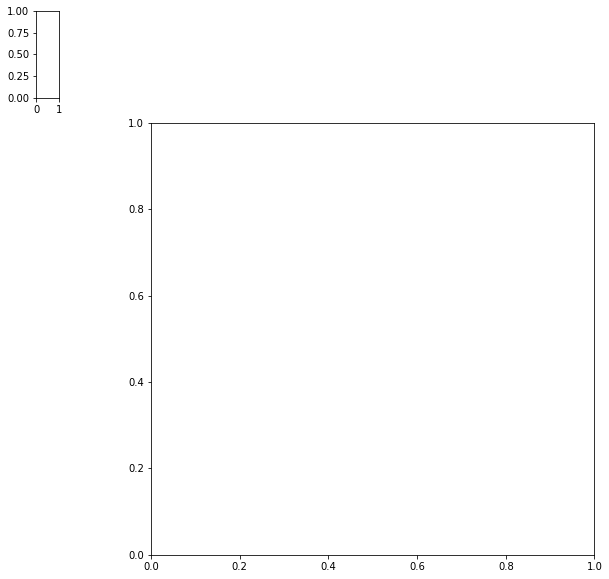

In [19]:
interact(plot_heatmap, method=['jaccard', 'cosine'])


# Step 6: Make Static Plots

In [20]:
def plot_heatmap(method):
    METRIC = method
    if METRIC == 'cosine':
        data = cosine_dist
    if METRIC=='jaccard':
        data = jaccard_dist
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.clustermap(data=data,cmap=cmap)

Show sample of a plot that is not interactive

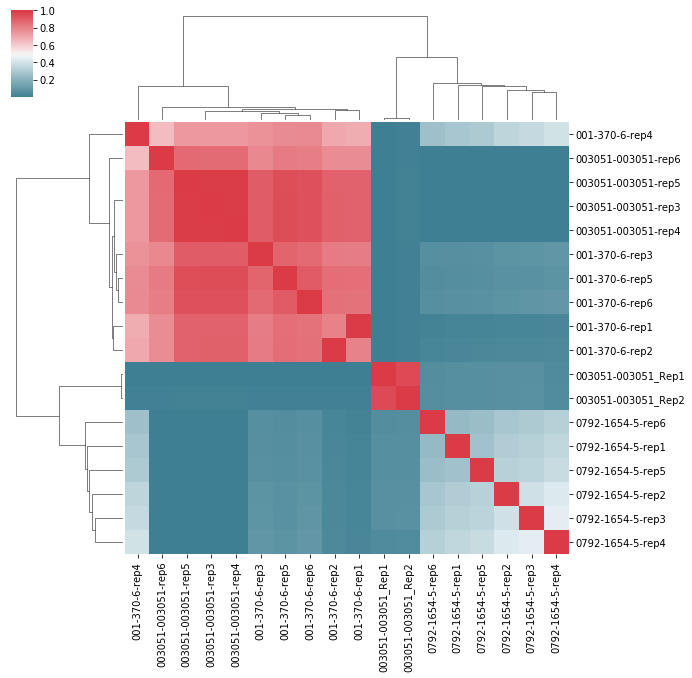

In [21]:
plot_heatmap('cosine')

ValueError: The condensed distance matrix must contain only finite values.

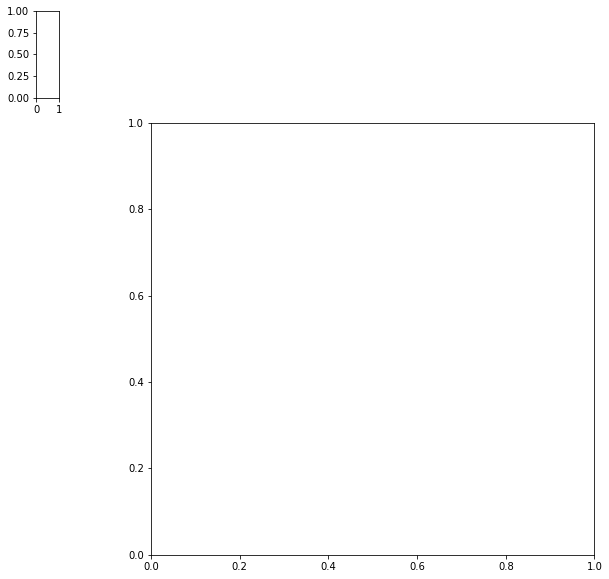

In [17]:


plot_heatmap('jaccard')